<a href="https://colab.research.google.com/github/Probal11/-AI-Ml-Assessment-Questions/blob/main/Netflix_Content_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
netflix_data = pd.read_csv('netflix_titles.csv')
print("\n=== Missing Values Before Cleaning ===")
print(netflix_data.isnull().sum())
netflix_data_cleaned_drop = netflix_data.dropna()

# 2. Filling missing values
netflix_data_cleaned_fill = netflix_data.fillna({
    'director': 'Unknown',  # Fill missing directors with 'Unknown'
    'cast': 'Unknown',      # Fill missing cast with 'Unknown'
    'country': 'Unknown',   # Fill missing country with 'Unknown'
    'date_added': 'Unknown', # Fill missing date_added with 'Unknown'
    'rating': 0,            # Fill missing ratings with 0
    'duration': 0           # Fill missing duration with 0
})

# Check missing values after cleaning
print("\n=== Missing Values After Cleaning ===")
print(netflix_data_cleaned_fill.isnull().sum())





=== Missing Values Before Cleaning ===
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

=== Missing Values After Cleaning ===
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


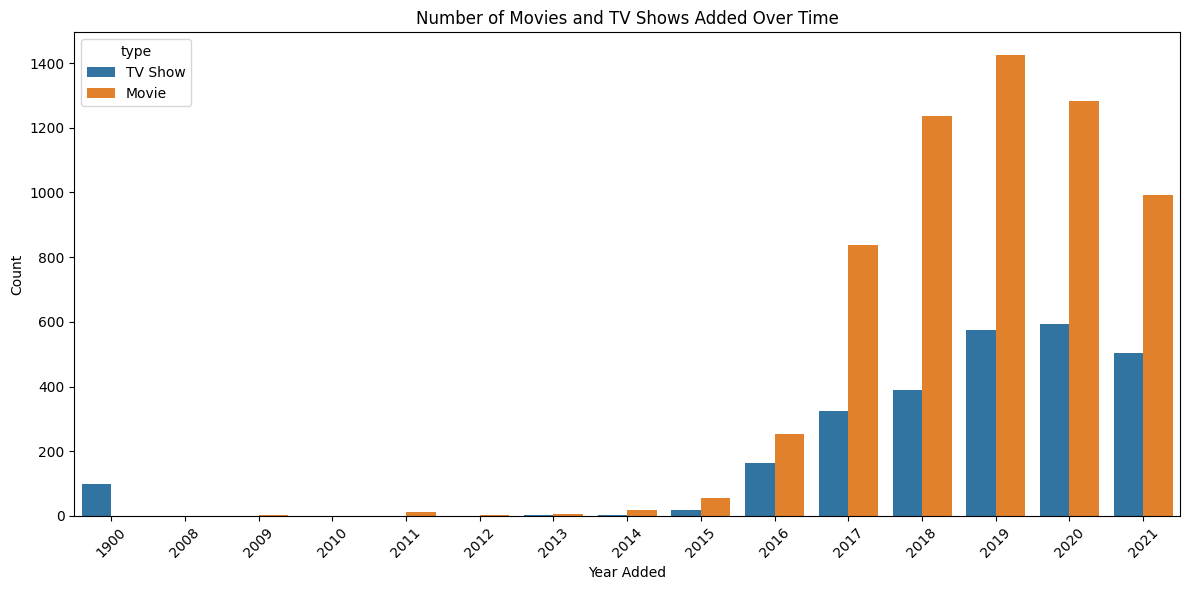

,added_year,type,count
0,1900,TV Show,98
1,2008,Movie,1
2,2008,TV Show,1
3,2009,Movie,2
4,2010,Movie,1


In [11]:
# Convert 'date_added' to datetime format, coercing errors to NaT
netflix_data_cleaned_fill['date_added'] = pd.to_datetime(netflix_data_cleaned_fill['date_added'], errors='coerce')

# Fill NaT values with a placeholder date (e.g., the current date or a specific date)
# For now, let's fill with a generic date like '1900-01-01' to avoid issues with 'Unknown' and allow conversion
netflix_data_cleaned_fill['date_added'] = netflix_data_cleaned_fill['date_added'].fillna(pd.to_datetime('1900-01-01'))

# Extract release year from date_added
netflix_data_cleaned_fill['added_year'] = netflix_data_cleaned_fill['date_added'].dt.year

# Group data by added year and type
grouped_by_year_type = netflix_data_cleaned_fill.groupby(['added_year', 'type']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='added_year', y='count', hue='type', data=grouped_by_year_type)
plt.title('Number of Movies and TV Shows Added Over Time')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

display(grouped_by_year_type.head())

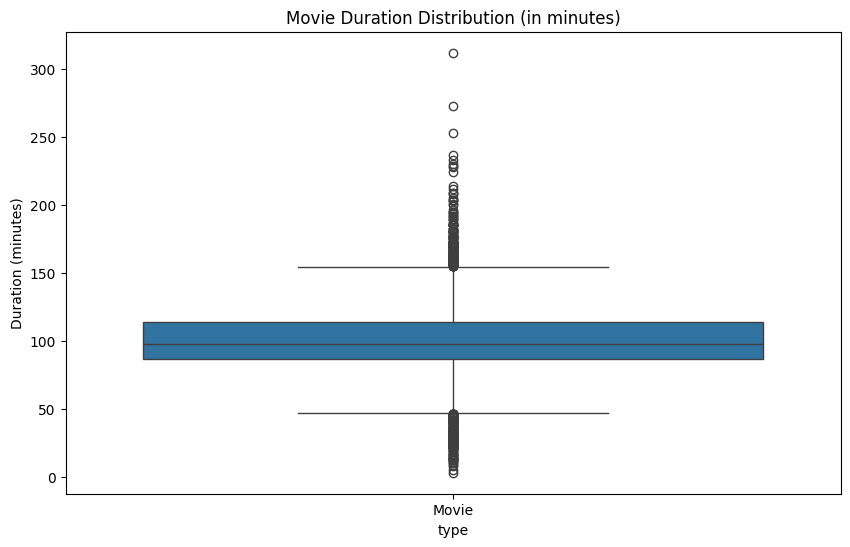

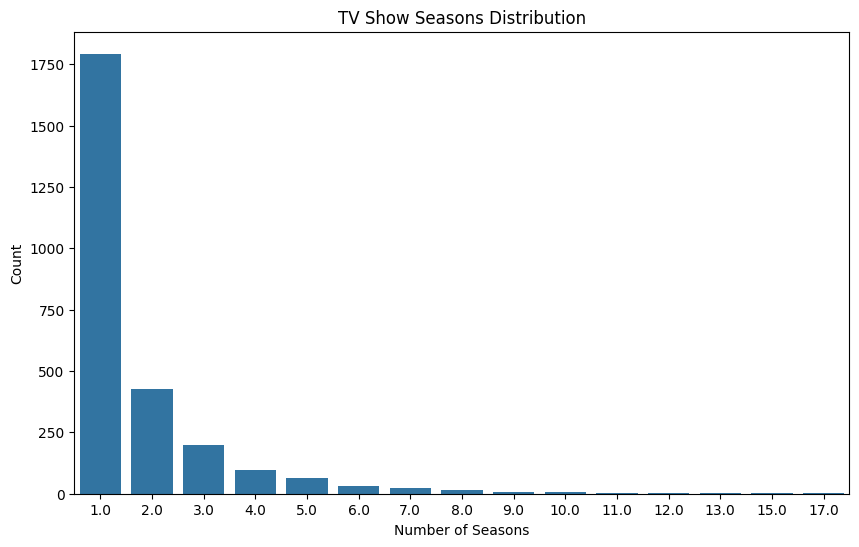

In [13]:
# Split 'duration' into value and unit
duration_split = netflix_data_cleaned_fill['duration'].str.split(' ', expand=True)
netflix_data_cleaned_fill['duration_value'] = pd.to_numeric(duration_split[0], errors='coerce')
netflix_data_cleaned_fill['duration_unit'] = duration_split[1]

# Plotting boxplot for movies (in minutes) and TV shows (in seasons) separately
# Boxplot for movies (duration in minutes)
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='duration_value', data=netflix_data_cleaned_fill[netflix_data_cleaned_fill['type'] == 'Movie'])
plt.title('Movie Duration Distribution (in minutes)')
plt.ylabel('Duration (minutes)')
plt.show()

# Boxplot for TV shows (duration in seasons) - might not be a boxplot, maybe a countplot of seasons
plt.figure(figsize=(10, 6))
sns.countplot(x='duration_value', data=netflix_data_cleaned_fill[netflix_data_cleaned_fill['type'] == 'TV Show'])
plt.title('TV Show Seasons Distribution')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()

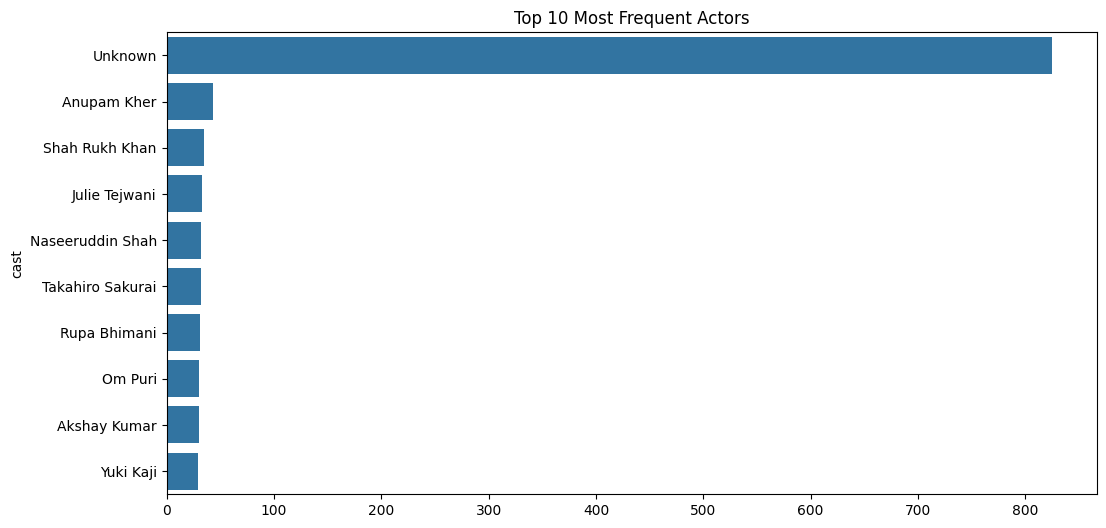

In [15]:
# Bar plots for top actors/directors
top_actors = netflix_data_cleaned_fill['cast'].str.split(', ').explode().value_counts().head(10)
top_directors =netflix_data_cleaned_fill['director'].str.split(', ').explode().value_counts().head(10)
# For actors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index)
plt.title('Top 10 Most Frequent Actors')
plt.show()

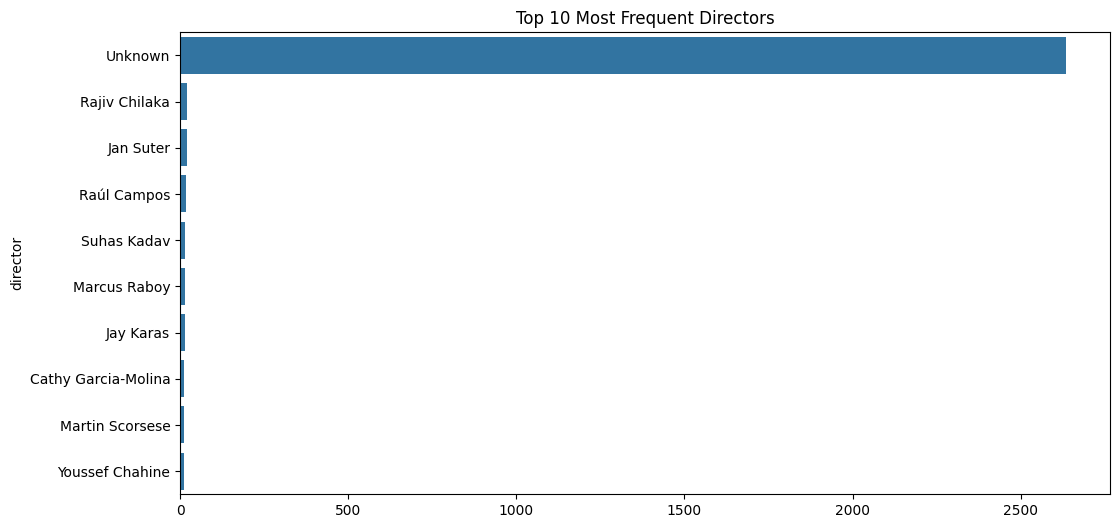

In [16]:
# For directors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Most Frequent Directors')
plt.show()